In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
wine_red = pd.read_csv('winequality-red.csv' , sep = ';')
wine_red.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
wine_white = pd.read_csv('winequality-white.csv', sep = ';')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_white.apply(np.mean)

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [5]:
wine_red.apply(np.mean)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [6]:
wine = pd.concat([wine_red, wine_white])
wine = wine.sample(frac=1) #перемешали строки
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
341,8.0,0.24,0.36,1.5,0.047,17.0,129.0,0.99480,3.20,0.54,10.0,6
1357,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1,6
1940,8.3,0.36,0.57,15.0,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1459,7.9,0.20,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7
2849,7.7,0.43,0.37,10.0,0.169,22.0,210.0,0.99776,3.02,0.64,9.5,5


In [7]:
#предобработка данных
features=wine.columns[:-1].tolist()
X=wine[features].values
y=wine['quality'].values

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_test, y_test). Обучим 2 модели – дерево решений и kNN, берем наугад: глубину дерева - 5, число ближайших соседей – 10.

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

tree = DecisionTreeClassifier(max_depth=5, random_state=10)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [9]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred) 

0.5302564102564102

In [10]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.46564102564102566

Настроим параметры дерева на кросс-валидации. Для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [11]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,12)}

In [12]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [13]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 12)},
             pre_dispatch='2*n_jobs

In [14]:
tree_grid.best_params_

{'max_depth': 8, 'max_features': 10}

In [15]:
tree_grid.best_score_

0.5561908950956674

In [16]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.5430769230769231

Настроим число соседей в алгоритме kNN.

In [17]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [18]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [19]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [20]:
knn_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [21]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 0.5755443149329228)

In [22]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.6148717948717949

Видим, что метод ближайших соседей показал себя лучше : 58.61% правильных ответов на кросс-валидации и 61.69% на отложенной выборке.
Дерево соответственно: 55.99% / 58% 

Распределения оценок по типам вина

Text(0.5, 0, 'Quality')

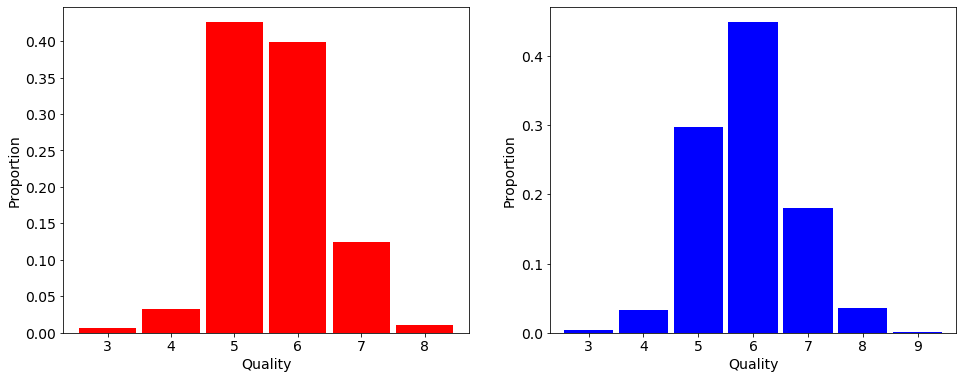

In [23]:
plt.figure(figsize(16,6))
plt.subplot(121)
stat = wine_red.groupby('quality')['quality'].agg(lambda x : float(len(x))/wine_red.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

plt.subplot(122)
stat2 = wine_white.groupby('quality')['quality'].agg(lambda x : float(len(x))/wine_white.shape[0])
stat2.plot(kind='bar', fontsize=14, width=0.9, color="blue")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

In [24]:
tmeans = sm.CompareMeans(sm.DescrStatsW(wine_red['quality']), 
                         sm.DescrStatsW(wine_white['quality']))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

4.888069044202246e-22

In [25]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(-0.29084357932805205, -0.19293009404017958)

In [26]:
np.mean(y_train)

5.812183857488454

In [27]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_train), y_train))

0.8661974381307708

In [28]:
sqrt(mean_squared_error([np.mean(y_train)]*len(y_test), y_test))

0.8893471926482008

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_train_predictions = regressor.predict(X_train)

In [31]:
y_test_predictions = regressor.predict(X_test)

Оценки вин и их предсказания на тестовой выборке

Text(0, 0.5, 'Estimated quality')

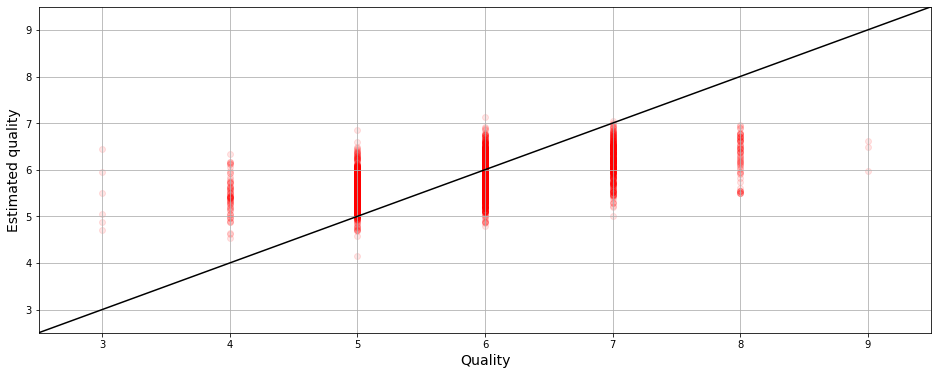

In [32]:
pyplot.scatter(y_test, y_test_predictions, color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
sqrt(mean_squared_error(lm.predict(X_train), y_train))

0.7300471301264926

In [35]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

0.7460128781032831

Оценки вин и их предсказания линейной моделью

Text(0, 0.5, 'Estimated quality')

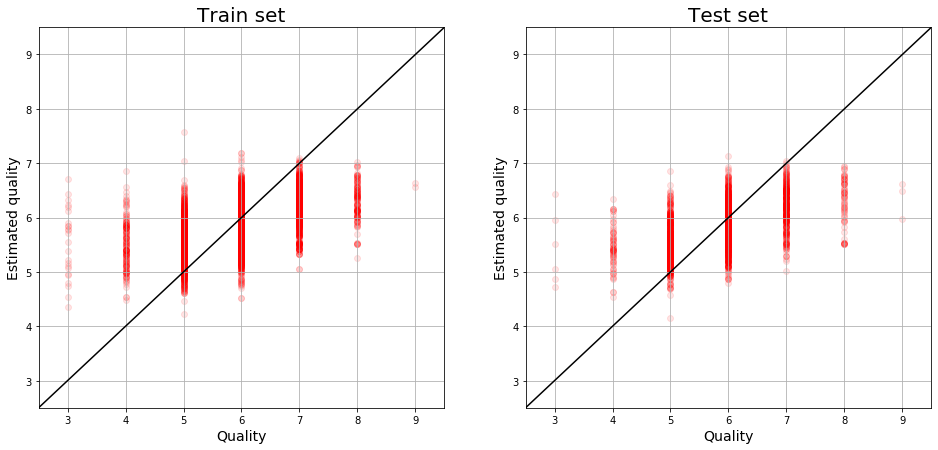

In [36]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)